In [1]:
# 1. Load the cars dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline

carData = pd.read_csv('autos_small.csv')
carData.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
1,3500,Bmw_320_cabrio,1996,0,manuell,150,3er,125000,NaN,bmw,cabrio
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio


In [2]:
# 2. Figure out the best strategy to fill missing values

carData.isnull().sum()

price                     0
name                      0
yearOfRegistration        0
monthOfRegistration       0
gearbox                 577
powerPS                   0
model                   567
kilometer                 0
fuelType                943
brand                     0
vehicleType            1050
dtype: int64

In [3]:
#carData.info()

In [4]:
## Since all the missing values are in categorical data it is better to drop them to avoid biasness in the dataset.
carData.dropna(inplace=True)

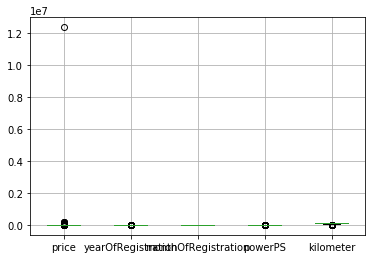

In [5]:
# 3. Complete any other preprocessing required.

carData[['gearbox','model','fuelType','brand','vehicleType']] = \
                                            carData[['gearbox','model','fuelType','brand','vehicleType']].astype('category')
carData.boxplot()

In [6]:
## Removing and Replacing outliers.
carData = carData[carData.price<110000]
outlPs = carData[carData.powerPS>800]
carData.powerPS = carData.powerPS.replace(outlPs.powerPS, 150)
carData.describe()

,price,yearOfRegistration,monthOfRegistration,powerPS,kilometer
count,8004.000000,8004.000000,8004.000000,8004.000000,8004.000000
mean,6305.035607,2003.073338,6.141179,121.168916,125016.866567
std,7910.962863,6.437989,3.523656,66.716941,39360.235388
min,0.000000,1931.000000,0.000000,0.000000,5000.000000
25%,1450.000000,1999.000000,3.000000,75.000000,100000.000000
50%,3500.000000,2003.000000,6.000000,114.000000,150000.000000
75%,8200.000000,2008.000000,9.000000,150.000000,150000.000000
max,99990.000000,2016.000000,12.000000,585.000000,150000.000000


In [7]:
carData2 = carData.copy()
carData2.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine


In [8]:
carData.drop(['monthOfRegistration','name'], axis=1, inplace=True)

In [9]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 0 to 9999
Data columns (total 9 columns):
price                 8004 non-null int64
yearOfRegistration    8004 non-null int64
gearbox               8004 non-null category
powerPS               8004 non-null int64
model                 8004 non-null category
kilometer             8004 non-null int64
fuelType              8004 non-null category
brand                 8004 non-null category
vehicleType           8004 non-null category
dtypes: category(5), int64(4)
memory usage: 693.8 KB


In [10]:
carData.head()

,price,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,1992,manuell,89,escort,60000,benzin,ford,kombi
2,2200,1998,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,2006,manuell,0,a3,150000,diesel,audi,limousine
4,2600,2002,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,2001,manuell,143,3er,150000,benzin,bmw,limousine


In [11]:
carDataEnc = pd.get_dummies(carData, columns = ['gearbox','fuelType','brand','vehicleType'], drop_first=True)
carDataEnc.head()

,price,yearOfRegistration,powerPS,model,kilometer,gearbox_manuell,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,...,brand_trabant,brand_volkswagen,brand_volvo,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv
0,400,1992,89,escort,60000,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2200,1998,150,c_klasse,150000,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4000,2006,0,a3,150000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2600,2002,41,fortwo,150000,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
5,2222,2001,143,3er,150000,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
X = carDataEnc.iloc[:, 1:].values
Y = carDataEnc.iloc[:, 0].values
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[1992, 89, 92, ..., 1, 0, 0],
       [1998, 150, 57, ..., 1, 0, 0],
       [2006, 0, 26, ..., 0, 1, 0],
       ...,
       [2011, 140, 206, ..., 0, 0, 0],
       [2002, 58, 211, ..., 0, 0, 0],
       [2012, 101, 141, ..., 0, 1, 0]], dtype=object)

In [13]:
# 4. Apply various regression models and find out which model is the best for this dataset

##### Model 1 - MLR

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#fit the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

#predict the test set results
y_pred = mlr.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(Y)-1)/(len(Y)-len(mlr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2,

(4987.056000667943, 0.6120044193097436, 0.6092703369492737)

##### Model 2 - OLS

In [15]:
X = carData.iloc[:, 1:]
Y = carData.iloc[:, 0]
X.head()

,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,1992,manuell,89,escort,60000,benzin,ford,kombi
2,1998,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,2006,manuell,0,a3,150000,diesel,audi,limousine
4,2002,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2001,manuell,143,3er,150000,benzin,bmw,limousine


In [16]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [17]:
import category_encoders as ce
ohe = ce.OneHotEncoder()
X2 = ohe.fit_transform(X)#.toarray()
X2 = sm.add_constant(X2)
m2 = sm.OLS(Y,X2).fit()
m2.summary()

/srv/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     76.01
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:52:02   Log-Likelihood:                -77840.
No. Observations:                8004   AIC:                         1.563e+05
Df Residuals:                    7717   BIC:                         1.583e+05
Df Model:                         286                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.028e+05   1.17e+04    -34.364      0.000   -4.26e+05    -3.8e+05
yearOfRegistration   366.0761     10.476     34.945      0.000     345.541     386.612
gearbox_1          -2.009e+05   5863.781    -34.260      0.000   -2.12e+05   -1.89e+05
gearbox_2          -2.019e+05   5858.283    -34.464      0.000   -2.13e+05    -1.9e+05
powerPS               27.6449      1.108     24.954      0.000      25.473      29.817
model_1            -3992.7711   1470.476     -2.715      0.007   -6875.302   -1110.240
model_2              212.7472   4246.447      0.050      0.960   -8111.442    8536.937
model_3            -3301.4355   1540.503     -2.143      0.032   -6321.239    -281.632
model_4            -3868.3180   1607.544     -2.406      0.016   -7019.540    -717.096
model_5               29.6365   2135.699      0.014      0.989   -4156.913    4216.186
model_6             -830.7936   1017.112     -0.817      0.414   -2824.609    1163.022
model_7            -1.352e+04   1500.563     -9.007      0.000   -1.65e+04   -1.06e+04
model_8            -3133.8353   4167.579     -0.752      0.452   -1.13e+04    5035.751
model_9             -646.2332    810.577     -0.797      0.425   -2235.185     942.718
model_10             665.6828    786.014      0.847      0.397    -875.119    2206.484
model_11           -1.467e+04   1456.396    -10.072      0.000   -1.75e+04   -1.18e+04
model_12           -1477.5098   1276.479     -1.157      0.247   -3979.754    1024.735
model_13           -4155.1318   1064.683     -3.903      0.000   -6242.200   -2068.064
model_14            1002.1737   1404.071      0.714      0.475   -1750.186    3754.533
model_15           -1.478e+04   1478.154    -10.002      0.000   -1.77e+04   -1.19e+04
model_16           -1.204e+04   3520.067     -3.420      0.001   -1.89e+04   -5138.028
model_17             936.9545   1059.021      0.885      0.376   -1139.014    3012.923
model_18           -6233.4173   1997.073     -3.121      0.002   -1.01e+04   -2318.612
model_19           -1.517e+04   1634.956     -9.277      0.000   -1.84e+04    -1.2e+04
model_20           -4455.3696   1014.053     -4.394      0.000   -6443.188   -2467.551
model_21            -996.3192   3084.517     -0.323      0.747   -7042.810    5050.172
model_22           -1746.2120   2984.435     -0.585      0.558   -7596.514    4104.090
model_23            1898.7794   2667.229      0.712      0.477   -3329.714    7127.273
model_24            2.827e+04   1734.785     16.298      0.000    2.49e+04    3.17e+04
model_25           -5366.4080   1278.989     -4.196      0.000   -7873.573   -2859.243
model_26           -4925.6294   1618.360     -3.044      0.002   -8098.055   -1753.204
model_27           -5047.1628    773.530     -6.525      0.000   -6563.493   -3530.833
model_28           -5842.8088    726.2

In [18]:
X3 = X.apply(LabelEncoder().fit_transform)
X3 = sm.add_constant(X3)
m3 = sm.OLS(Y,X3).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1141.
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:52:03   Log-Likelihood:                -80153.
No. Observations:                8004   AIC:                         1.603e+05
Df Residuals:                    7995   BIC:                         1.604e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                177.4782    666.409      0.266      0.790   -1128.858    1483.814
yearOfRegistration   256.0803     11.102     23.066      0.000     234.317     277.843
gearbox            -1525.0481    159.938     -9.535      0.000   -1838.569   -1211.528
powerPS               68.6222      1.416     48.457      0.000      65.846      71.398
model                  2.6500      1.037      2.555      0.011       0.617       4.683
kilometer          -1002.7542     24.093    -41.620      0.000   -1049.983    -955.525
fuelType             422.5416     59.700      7.078      0.000     305.514     539.570
brand                 10.4707      5.505      1.902      0.057      -0.321      21.262
vehicleType         -219.1771     36.108     -6.070      0.000    -289.958    -148.396
==============================================================================
Omnibus:                     7241.843   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           536734.545
Skew:                           4.062   Prob(JB):                         0.00
Kurtosis:                      42.286   Cond. No.                     1.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X4 = pd.get_dummies(X, drop_first=True)
X4 = sm.add_constant(X4)
m4 = sm.OLS(Y,X4).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     76.01
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:52:09   Log-Likelihood:                -77840.
No. Observations:                8004   AIC:                         1.563e+05
Df Residuals:                    7717   BIC:                         1.583e+05
Df Model:                         286                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -7.313e+05   2.12e+04    -34.450      0.000   -7.73e+05    -6.9e+05
yearOfRegistration         366.0761     10.476     34.945      0.000     345.541     386.612
powerPS                     27.6449      1.108     24.954      0.000      25.473      29.817
kilometer                   -0.0610      0.001    -41.790      0.000      -0.064      -0.058
gearbox_manuell          -1009.9658    139.634     -7.233      0.000   -1283.687    -736.244
model_145                 4205.5183   4501.129      0.934      0.350   -4617.917     1.3e+04
model_147                  691.3356   2119.763      0.326      0.744   -3463.975    4846.646
model_156                  124.4531   2170.098      0.057      0.954   -4129.527    4378.433
model_159                 4022.4076   2592.143      1.552      0.121   -1058.895    9103.711
model_1_reihe             3161.9775   1767.340      1.789      0.074    -302.489    6626.444
model_1er                -9522.7641   2111.935     -4.509      0.000   -1.37e+04   -5382.798
model_200                  858.9358   4328.122      0.198      0.843   -7625.359    9343.231
model_2_reihe             3346.5379   1661.287      2.014      0.044      89.965    6603.111
model_3_reihe             4658.4539   1647.241      2.828      0.005    1429.414    7887.493
model_3er                -1.068e+04   2079.289     -5.134      0.000   -1.48e+04   -6599.472
model_4_reihe             2515.2613   1934.465      1.300      0.194   -1276.816    6307.338
model_500                 -162.3607   1804.453     -0.090      0.928   -3699.578    3374.857
model_5_reihe             4994.9448   2022.678      2.469      0.014    1029.947    8959.943
model_5er                -1.079e+04   2096.271     -5.148      0.000   -1.49e+04   -6682.144
model_601                -8045.5431   3821.245     -2.105      0.035   -1.55e+04    -554.866
model_6_reihe             4929.7256   1799.271      2.740      0.006    1402.667    8456.784
model_6er                -2240.6462   2502.638     -0.895      0.371   -7146.496    2665.203
model_7er                -1.117e+04   2214.854     -5.045      0.000   -1.55e+04   -6833.215
model_80                  -462.5985   1500.707     -0.308      0.758   -3404.391    2479.194
model_850                 2996.4519   3425.884      0.875      0.382   -3719.211    9712.114
model_90                  2246.5591   3194.519      0.703      0.482   -4015.566    8508.684
model_900                 5891.5505   3034.546      1.941      0.052     -56.984    1.18e+04
model_911                 3.227e+04   2274.984     14.183      0.000    2.78e+04    3.67e+04
model_a1                 -1373.6369   1705.895     -0.805      0.421   -4717.655    1970.381
model_a2                  -932.8582   1973.545     -0.473      0.636   -4801.543    2935.826
model_a3      

##### Model 3 - Feature Selection

In [20]:
carData2.head()

,price,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,400,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
2,2200,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,4000,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,2600,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,2222,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine


In [21]:
X5 = carData2.iloc[:, 1:]
Y5 = carData2.iloc[:, 0]
X5.head()

,name,yearOfRegistration,monthOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,vehicleType
0,Ford_Escort,1992,8,manuell,89,escort,60000,benzin,ford,kombi
2,Mercedes_C_230_T_im_top_Zustand_Tuev_Neu!!_Win...,1998,0,manuell,150,c_klasse,150000,benzin,mercedes_benz,kombi
3,A3_Limousine,2006,7,manuell,0,a3,150000,diesel,audi,limousine
4,Smart_Smart_cabrio_450_cdi,2002,7,automatik,41,fortwo,150000,diesel,smart,cabrio
5,BMW_318ti_compact,2001,10,manuell,143,3er,150000,benzin,bmw,limousine


In [22]:
#X5 = X5.apply(LabelEncoder().fit_transform)
#X5 = pd.get_dummies(X5)
X5[:, 0] = le.fit_transform(X5[:, 0]) 
X5 = ohe.fit_transform(X5)

X5.head()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X5, Y5)
importances = tree_clf.feature_importances_
feature_names = X5.iloc[:, 0:].columns.tolist()
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
features


In [ ]:
# 5. Apply different Outlier detection methods and choose best approach to treat outliers 

## Replacing outliers with mean value.
'''
outlYear = carData[(carData.yearOfRegistration<1910) | (carData.yearOfRegistration>2019)]
carData.yearOfRegistration = carData.yearOfRegistration.replace(outlYear.yearOfRegistration, 2004)
outlPs = carData[carData.powerPS>800]
carData.powerPS = carData.powerPS.replace(outlPs.powerPS, 200)
carData.info()
carData.boxplot()

'''
